Todo:

1. Write done understanding of each section where applicable.
2.


In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
import os

path = os.path.join("data", "raw", "Salary_Data_v2.csv")
df = pd.read_csv(path)

In [110]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='str')

## Renaming column accordingly

In [111]:
df.rename(
    columns={
        "Education Level": "education_level",
        "Job Title": "job_title",
        "Years of Experience": "yoe",
    },
    inplace=True,
)

In [112]:
columns = [col.lower() for col in df.columns]
df.rename(columns=dict(zip(df.columns, columns)), inplace=True)

## Simple Cleaning
1. Dropping NA
2. lowering all string
3. Removing Whitespace

In [113]:
df.dropna(inplace=True)
df.gender = df.gender.str.lower()
df.education_level = df.education_level.str.lower()
df.job_title = df.job_title.str.lower().replace(" ", "", regex=False)

## Fixing gender column

In [114]:
df.gender.unique()

<StringArray>
['male', 'female', 'other']
Length: 3, dtype: str

In [115]:
df.where(df.gender != 'other', inplace=True).dropna(inplace=True)

In [116]:
df.gender.value_counts()

gender
male      3671
female    3013
Name: count, dtype: int64

## Handling Education Level

In [117]:
df.education_level.value_counts()

education_level
bachelor's degree    2265
master's degree      1570
phd                  1369
bachelor's            756
high school           436
master's              288
Name: count, dtype: int64

In [118]:
df.education_level.unique()

<StringArray>
[       'bachelor's',          'master's',               'phd',
 'bachelor's degree',   'master's degree',       'high school']
Length: 6, dtype: str

In [119]:
df.education_level = (
    df.education_level.str.replace("bachelor's degree", "bachelor")
    .replace("master's degree", "master")
    .replace("bachelor's", "bachelor")
    .replace("master's", "master")
    .replace("high school", "high_school")
)

In [120]:
df.education_level.value_counts(normalize=True) * 100

education_level
bachelor       45.197487
master         27.797726
phd            20.481747
high_school     6.523040
Name: proportion, dtype: float64

## Handling job title column

In [121]:
df.job_title = df.job_title.str.replace(" ", "", regex=False)

In [122]:
len(df), df.job_title.nunique()

(6684, 190)

In [123]:
df.job_title.value_counts(normalize=True).round(4).sort_values(ascending=False).where(
    lambda x: x > 0.0091
).dropna().head(10) * 100
# select only major contributor for classification and make remaining in other.

job_title
softwareengineer           7.75
datascientist              6.78
softwareengineermanager    5.63
dataanalyst                5.43
seniorprojectengineer      4.73
productmanager             4.68
fullstackengineer          4.55
frontenddeveloper          4.04
marketingmanager           3.82
backenddeveloper           3.62
Name: proportion, dtype: float64

In [124]:
major_cats = {
    "technology": [
        "frontend",
        "software",
        "fullstack",
        "backend",
        "developer",
    ],
    "product": [
        "project",
        "product",
    ],
    "marketing": [
        "market",
        "sales",
        "operation",
    ],
    "data": [
        "data",
        "scientist",
    ],
    "hr": [
        "human",
        "hr",
        "talent",
        "recruit",
    ],
    "finance": [
        "finance",
        "financial",
        "account",
    ],
    "design": [
        "design",
        "ux",
        "ui",
    ],
}


def map_cat(title: str):
    for cat, keywords in major_cats.items():
        for kw in keywords:
            if kw in title.lower():
                return cat
    return "other"


df["job_cat"] = df.job_title.apply(map_cat)

<Axes: xlabel='job_cat'>

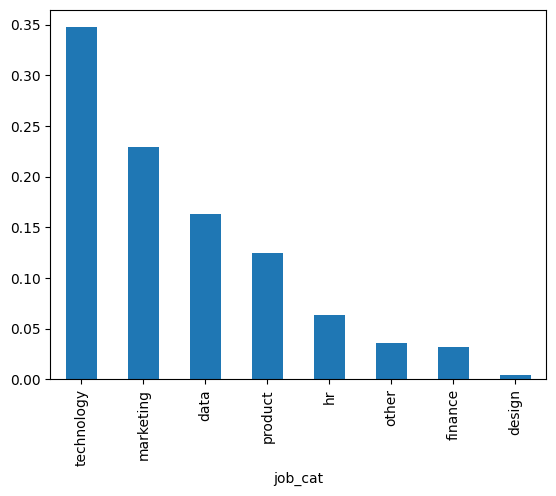

In [125]:
df.job_cat.value_counts(normalize=True).plot(kind="bar")
# class imbalance is there but not that high.

In [126]:
df[df["job_cat"] == "technology"]["job_title"].value_counts(normalize=True).head(10) * 100

job_title
softwareengineer           22.327586
softwareengineermanager    16.206897
fullstackengineer          13.103448
frontenddeveloper          11.637931
backenddeveloper           10.431034
seniorsoftwareengineer     10.344828
softwaredeveloper           5.387931
webdeveloper                3.750000
juniorsoftwaredeveloper     2.500000
juniorsoftwareengineer      2.198276
Name: proportion, dtype: float64

## Creating New Feature for Seniority
- Should we remove very low contributing job titles as they might be noise


In [127]:
def seniority_cat(title: str):
    if "senior" in title.lower():
        return "senior"
    elif "junior" in title.lower():
        return "junior"
    elif "lead" in title.lower():
        return "lead"
    elif "manager" in title.lower():
        return "manager"
    elif (
        "director" in title.lower()
        or "vp" in title.lower()
        or "vicepresident" in title.lower()
    ):
        return "director"
    elif (
        "cheif" in title.lower()
        or "ceo" in title.lower()
        or "cfo" in title.lower()
        or "coo" in title.lower()
    ):
        return "cxo"
    else:
        return "associate"


df["seniority"] = df.job_title.apply(seniority_cat)

<Axes: xlabel='seniority'>

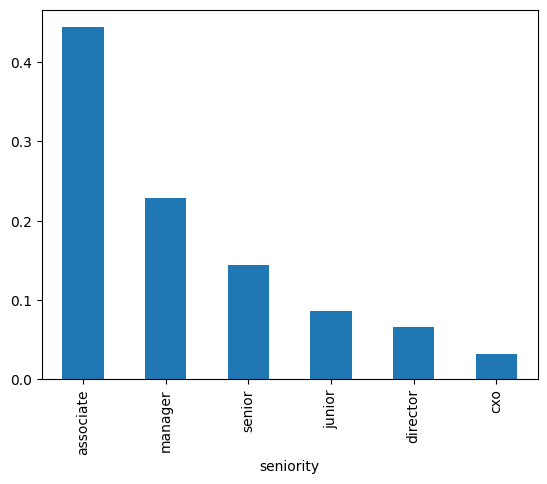

In [128]:
df.seniority.value_counts(normalize=True).plot(kind="bar")

## Fixing Salary column
- Should salary column transform into logarithmic scale

In [133]:
df.where(df.salary > 0, inplace=True).dropna(inplace=True)

<Axes: ylabel='Frequency'>

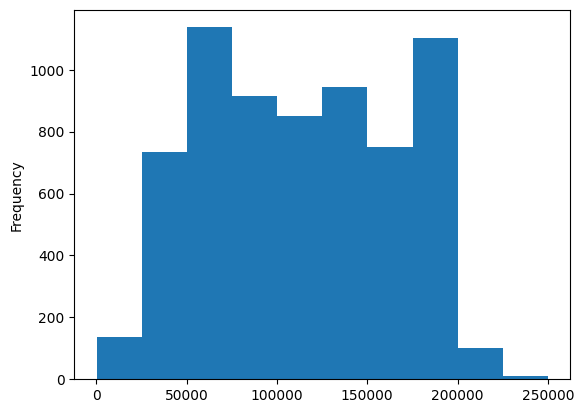

In [134]:
df.salary.plot(kind='hist')

In [131]:
df.head()

,age,gender,education_level,job_title,yoe,salary,job_cat,seniority
0,32.0,male,bachelor,softwareengineer,5.0,90000.0,technology,associate
1,28.0,female,master,dataanalyst,3.0,65000.0,data,associate
2,45.0,male,phd,seniormanager,15.0,150000.0,other,senior
3,36.0,female,bachelor,salesassociate,7.0,60000.0,marketing,associate
4,52.0,male,master,director,20.0,200000.0,other,director


<Axes: xlabel='gender', ylabel='salary'>

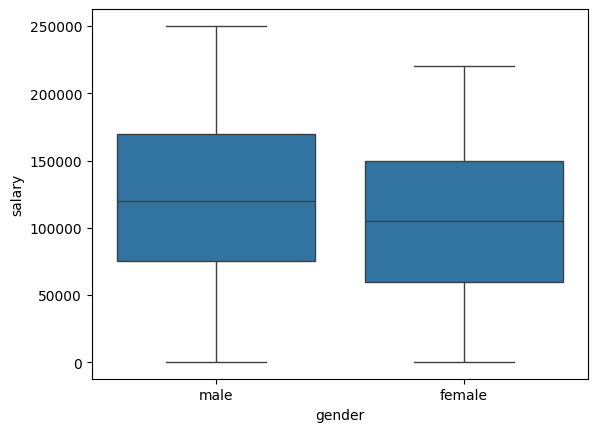

In [132]:
sns.boxplot(data=df, x="gender", y="salary")

## EDA


1. Describing dataset.


In [42]:
df.describe()
# reaming are categorical or non numeric

,age,yoe,salary
count,6698.000000,6698.000000,6698.000000
mean,33.623022,8.095178,115329.253061
std,7.615784,6.060291,52789.792507
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6698 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              6698 non-null   float64
 1   gender           6698 non-null   object 
 2   education_level  6698 non-null   object 
 3   job_title        6698 non-null   object 
 4   yoe              6698 non-null   float64
 5   salary           6698 non-null   float64
dtypes: float64(3), object(3)
memory usage: 366.3+ KB


In [44]:
df

,age,gender,education_level,job_title,yoe,salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


<Axes: ylabel='Frequency'>

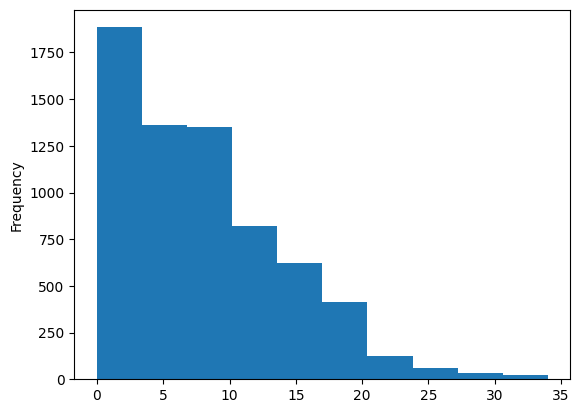

In [ ]:
df.yoe.plot(kind="hist")

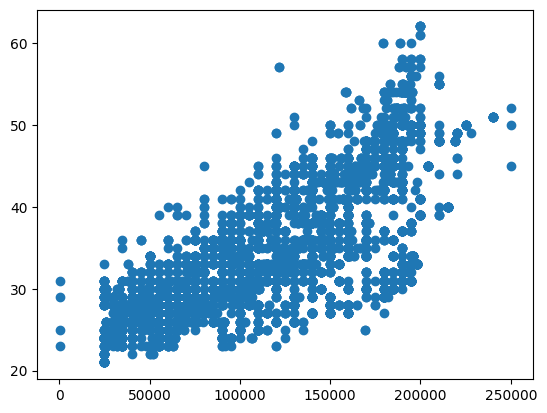

In [26]:
plt.scatter(df.salary, df.age)

<Axes: xlabel='education_level', ylabel='salary'>

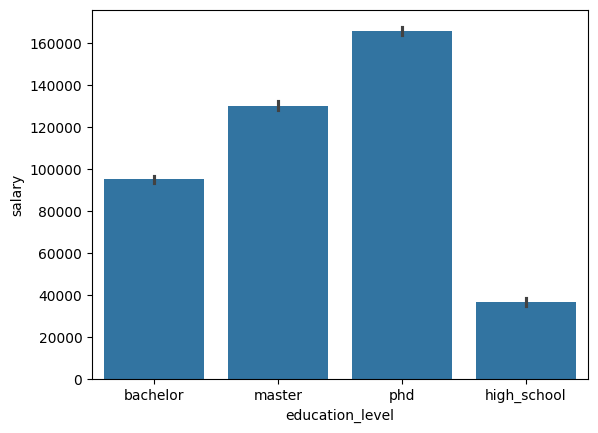

In [ ]:
sns.barplot(df, x="education_level", y="salary")

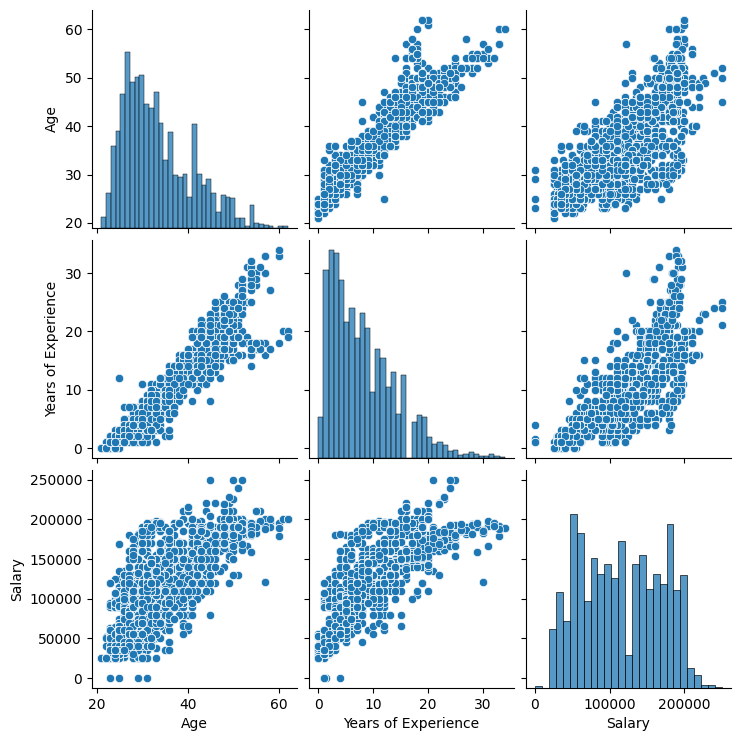

In [10]:
sns.pairplot(df)

In [136]:
df.columns

Index(['age', 'gender', 'education_level', 'job_title', 'yoe', 'salary',
       'job_cat', 'seniority'],
      dtype='str')

<Axes: >

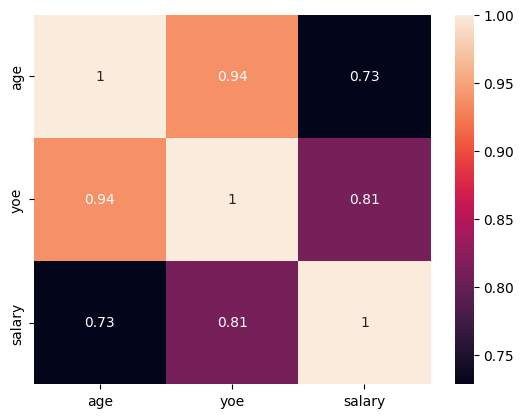

In [137]:
sns.heatmap(df[['age', 'yoe', 'salary']].corr(), annot=True)